<a href="https://colab.research.google.com/github/utkarshg1/Pytorch/blob/main/Pytorch_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer vision

In [1]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)

2.6.0+cu124


In [3]:
print(torchvision.__version__)

0.21.0+cu124


## Getting dataset FashionMNIST

In [4]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform= ToTensor(),
    target_transform=None
)

In [5]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform= ToTensor(),
    target_transform=None
)

In [6]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
image, label = train_data[0]

In [9]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [10]:
label

9

In [11]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

9

In [15]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## Visualize images

torch.Size([1, 28, 28])


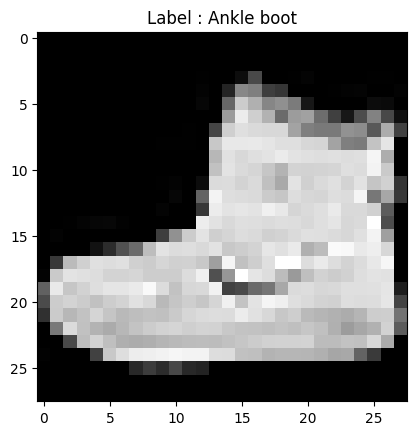

In [16]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label : {class_names[label]}")
plt.show()

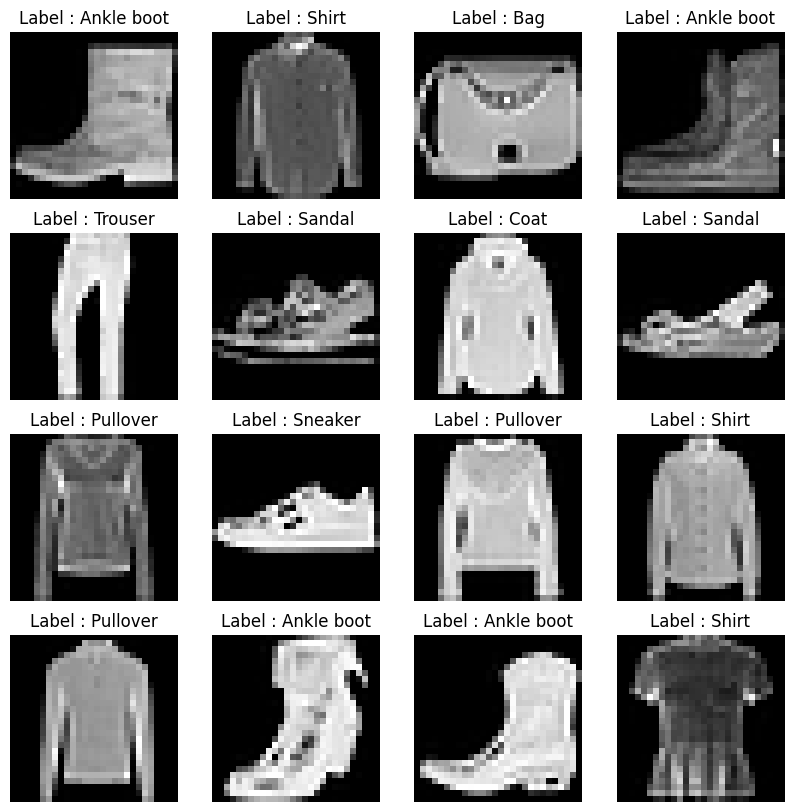

In [17]:
# plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(f"Label : {class_names[label]}")
  plt.axis(False)

plt.show()

## Prepare data loader

In [18]:
from torch.utils.data import DataLoader

In [19]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size= BATCH_SIZE,
    shuffle= True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size= BATCH_SIZE,
    shuffle= False
)

In [20]:
train_dataloader

In [21]:
test_dataloader

In [22]:
len(train_dataloader)

1875

In [23]:
len(test_dataloader)

313

In [24]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [25]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [26]:
train_labels_batch

tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
        9, 7, 8, 8, 3, 3, 7, 2])

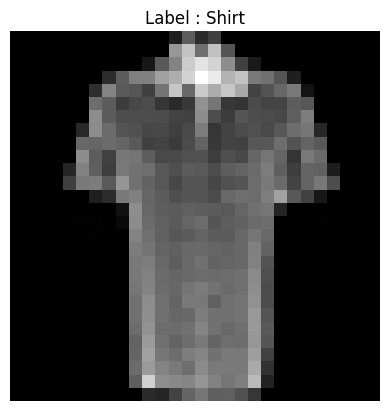

In [27]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Label : {class_names[label]}")
plt.axis(False)
plt.show()

## Create a baseline model

In [28]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get single sample
x = train_features_batch[0]
print(x.shape)

# Flatten model
output = flatten_model(x)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [29]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features=hidden_units),
        nn.Linear(in_features = hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [30]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [31]:
dummy_x = torch.rand(size=(1, 1, 28, 28))
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [32]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## Setup loss optimizer and metrics

In [33]:
# download scripts
import requests
from pathlib import Path

In [34]:
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download ...")
else:
  print("Downloading helper_functions.py ...")
  url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
  response = requests.get(url)
  with open("helper_functions.py", "wb") as f:
    f.write(response.content)

helper_functions.py already exists, skipping download ...


In [35]:
from helper_functions import accuracy_fn

In [36]:
loss_fn = nn.CrossEntropyLoss()

In [37]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## Create a function to time model

In [38]:
from timeit import default_timer as timer

In [39]:
def print_train_time(start: float, end:float, device: torch.device=None) -> float:
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## Create a training loop and train batches

In [40]:
from tqdm.auto import tqdm

In [41]:
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# Epochs
epochs = 3

# Create train and test loops
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------------")
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Get average train loss
  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate test loss average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Test loss
  print(f"Train loss : {train_loss:.4f} | Test loss : {test_loss:.4f}, Test acc : {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.5904 | Test loss : 0.5095, Test acc : 82.0387
Epoch : 1
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.4763 | Test loss : 0.4799, Test acc : 83.1969
Epoch : 2
--------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss : 0.4550 | Test loss : 0.4766, Test acc : 83.4265
Train time on cpu: 32.332 seconds


## Evaluate Model

In [42]:
torch.manual_seed(42)
def eval_model(model: nn.Module, data_loader: DataLoader, loss_fn: nn.Module):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc}

# Evaluate on model0
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Setup device agnostic code

In [43]:
!nvidia-smi

Mon Mar 24 08:11:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [44]:
torch.cuda.is_available()

True

In [45]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Build a model with Non Linearity

In [55]:
class FashionMNISTModelV1(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [56]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [57]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [58]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()

In [59]:
help(accuracy_fn)

Help on function accuracy_fn in module helper_functions:

accuracy_fn(y_true, y_pred)
    Calculates accuracy between truth labels and predictions.
    
    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.
    
    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45



In [60]:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### Functionizing train and evaluation

In [61]:
def train_step(
    model: nn.Module,
    data_loader: DataLoader,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    model.train()
    ypred = model(X)
    loss = loss_fn(ypred, y)
    train_loss += loss
    acc = accuracy_fn(y_true=y, y_pred=ypred.argmax(dim=1))
    train_acc += acc
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Train loss and accuracy average
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss : {train_loss:.4f} | Train acc : {train_acc:.2f} %")

In [62]:
def test_step(model:nn.Module,
              data_loader: DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss : {test_loss:.4f} | Test acc : {test_acc:.2f} %\n")

In [63]:
torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------------
Train Loss : 1.0920 | Train acc : 61.34 %
Test Loss : 0.9564 | Test acc : 65.00 %

Epoch : 1
--------------
Train Loss : 0.7810 | Train acc : 71.93 %
Test Loss : 0.7223 | Test acc : 73.91 %

Epoch : 2
--------------
Train Loss : 0.6703 | Train acc : 75.94 %
Test Loss : 0.6850 | Test acc : 75.02 %

Train time on cuda: 28.124 seconds


In [ ]:
# Get model_1 results
model_1_results = eval_model(model_1, test_dataloader, loss_fn)